<h1> K-NN Regression vs Linear Regression: Predicting a Tennis Player's Prize Money Based on Their Best Rank</h1>

<h2> Background Information </h2>
    
<p> In DSCI 100, we have learned about two ways to predict outcomes from a dataset: classification and regression. Classification is the type of prediction one would use to predict a category. For example, predicting apple type. Regression, on the other hand, is used to predict continuous variables. For example, house prices. Regression includes two types: k-nn regression and linear regression. Each are useful for different instances— k-nn for non-linear data, and linear for more linear data and to predict past the dataset.
    
Unlike most of the sports in the world, where athletes are paid through signing bonuses and salary, tennis is one such sport where a player earns their salarybread through the prize money mainly (excluding endorsements, TV ads etc.). On average, the top 5 players make around $8 million per year, whereas the players between 50-100 rank get around half a million dollars. This gives us a clear idea that being a professional tennis player is only a profitable profession when you are in the top of the ranking tables, otherwise the ones who aren’t able to achieve that much or break even shift to a different career.</p>
    
[Link to Top 500 Tennis Players' Statistics](https://www.ultimatetennisstatistics.com/tournamentEvents)

<h2> Purpose </h2>
<p> The purpose of our project is to a) predict how much prize money a pro tennis player can earn given their best rank number, and b) run both k-nn and linear regression models on our data to determine which model best suits our dataset and why. The dataset that will be used to achieve this is the 500 Tennis Players’ Statistics dataset from the Ultimate Tennis Statistics website. The algorithms that will be used are both k-nn regression and linear regression. This is because the variable we want to predict is not categorical. The target variable will be the prize money column and our predictor will be the best rank column of the dataset. Based on the sources we have referred to, they suggest that better performance results in higher prize money. Thus we expect to see that the better the ranking (a lower rank number), the higher the prize money in US dollars.</p>

In [1]:
#loading libraries

library(tidyverse)
library(repr)
library(tidymodels)
library(digest)
options(repr.matrix.max.rows = 6)
#source("tests.R")
#source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

<h2>Loading and Wrangling Data</h2>
<p>Before we begin our analysis and forming models, we want to tidy our data, so that our packages work smoothly on our dataset. We first load the url onto the Jupyter Notebook under the name player_stats. </p>

In [2]:
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


<p>We select the Best Rank column and Prize Money column and get rid of the NAs in the code. All other columns aren’t used. We turned the columns that needed to be numerical into numerical columns. In our dataset, the prize money was spaced in a way in which we could not use it as it was. So in the code we mutate the column by breaking down the entire number into millions, thousands, and hundreds columns and then rejoining them again.</p>

In [3]:
# tidying data/renaming Turned Pro

players_tidy <- player_stats|>
    separate(col = "Best Rank",
             into = c("best_rank", 
                   "Best_rank_day", "Best_rank_month", "Best_rank_year"),
            convert = TRUE) |>
    select(-Best_rank_day, -Best_rank_month) |>
    rename("prize_money" = "Prize Money")|>
    separate(prize_money, c(NA, "millions", "thousands", "hundreds"))|>
    mutate(millions = as.numeric(millions))|>
    mutate(thousands = as.numeric(thousands))|>
    mutate(hundreds = as.numeric(hundreds))|>
    mutate(millions = millions * 1000000)|>
    mutate(thousands = thousands * 1000)|>
    mutate(prize_money = millions + thousands + hundreds)|>
    mutate(prize_money= prize_money/1000)|>
    select(prize_money, best_rank)|>
    na.omit()
players_tidy


Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 4 pieces. Additional pieces discarded in 21 rows [16, 96, 128, 142, 208, 212, 228, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468, ...].”
Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 264 rows [2, 4, 7, 8, 9, 10, 13, 14, 15, 18, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, ...].”


prize_money,best_rank
<dbl>,<int>
3261.567,44
6091.971,17
1517.157,31
⋮,⋮
1703.096,58
1048.314,74
22132.368,4


In [4]:
# setting seed
set.seed(1552)

Warning message:
“Removed 4 rows containing missing values (geom_point).”


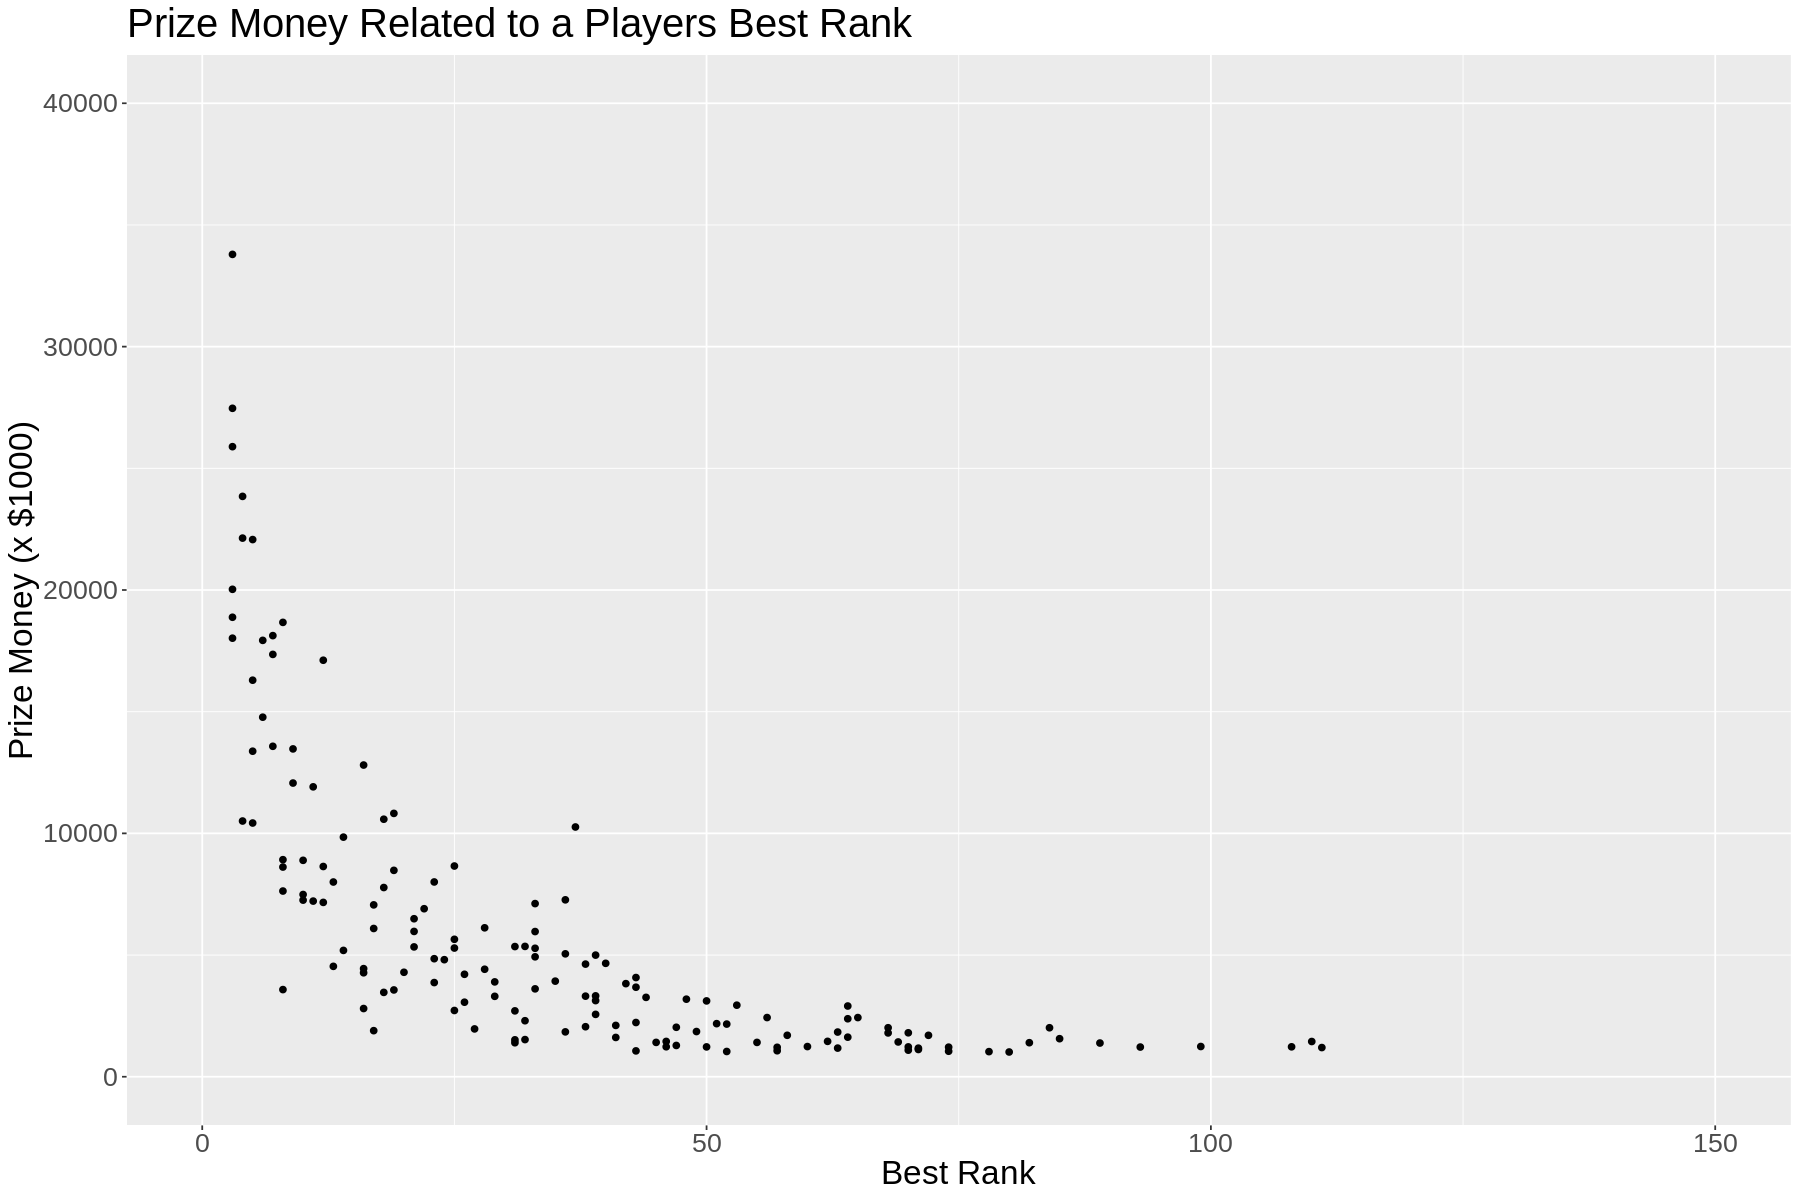

In [5]:
#scatterplot best rank vs. prize money

options(repr.plot.width = 15, repr.plot.height = 10)

players_plot<-players_tidy|>
    ggplot(aes(x = best_rank, y = prize_money))+
    geom_point()+
    labs(x = "Best Rank", y = "Prize Money (x $1000)")+
    ggtitle("Prize Money Related to a Players Best Rank")+
    ylim(0,40000)+
    xlim(0,150)+
    theme(text = element_text(size = 20))
players_plot

Figure 1

K-NN Regression Model:

In [6]:
#splitting data

set.seed(4242)

players_split<-initial_split(players_tidy, prop = 0.75, strata = prize_money)
players_training<-training(players_split)
players_testing<-testing(players_split)
players_training
players_testing



prize_money,best_rank
<dbl>,<int>
1517.157,31
1285.541,47
1563.471,85
⋮,⋮
18879.855,3
8918.917,8
22132.368,4


prize_money,best_rank
<dbl>,<int>
3261.567,44
25889.586,3
2722.314,25
⋮,⋮
14773.644,6
3304.117,29
1703.096,58


In [7]:
#making recipe

players_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("regression")

players_recipe<-recipe(prize_money ~ best_rank, data = players_training)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

players_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [8]:
#making workflow
set.seed(4205)
players_vfold<-vfold_cv(players_training, v = 5, strata = prize_money)

players_fit<-workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(players_training)
players_fit



Warning message:
“tune samples were requested but there were 115 rows in the data. 110 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 7396.49
Minimal mean squared error: 299230369
Best kernel: rectangular
Best k: 110

In [9]:
#knn regression metrics
set.seed(3764)
gridvals<-tibble(neighbors = seq(1, 50))

players_results<- players_fit|>
    tune_grid(resamples = players_vfold, grid = gridvals)|>
    collect_metrics()
players_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7558.0817145,5,2.070785e+03,Preprocessor1_Model01
1,rsq,standard,0.6807709,5,9.185236e-02,Preprocessor1_Model01
2,rmse,standard,5913.7306939,5,1.834785e+03,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,4.004500e-01,5,8.669204e-02,Preprocessor1_Model49
50,rmse,standard,1.242536e+04,5,4.933862e+03,Preprocessor1_Model50
50,rsq,standard,3.946393e-01,5,8.372357e-02,Preprocessor1_Model50


In [10]:
#arranging metrics 

players_min<-players_results|>
    filter(.metric == "rmse")|>
    arrange(std_err)|>
    slice(1)
players_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,rmse,standard,5913.731,5,1834.785,Preprocessor1_Model02


In [11]:
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7558.0817145,5,2.070785e+03,Preprocessor1_Model01
1,rsq,standard,0.6807709,5,9.185236e-02,Preprocessor1_Model01
2,rmse,standard,5913.7306939,5,1.834785e+03,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,4.004500e-01,5,8.669204e-02,Preprocessor1_Model49
50,rmse,standard,1.242536e+04,5,4.933862e+03,Preprocessor1_Model50
50,rsq,standard,3.946393e-01,5,8.372357e-02,Preprocessor1_Model50


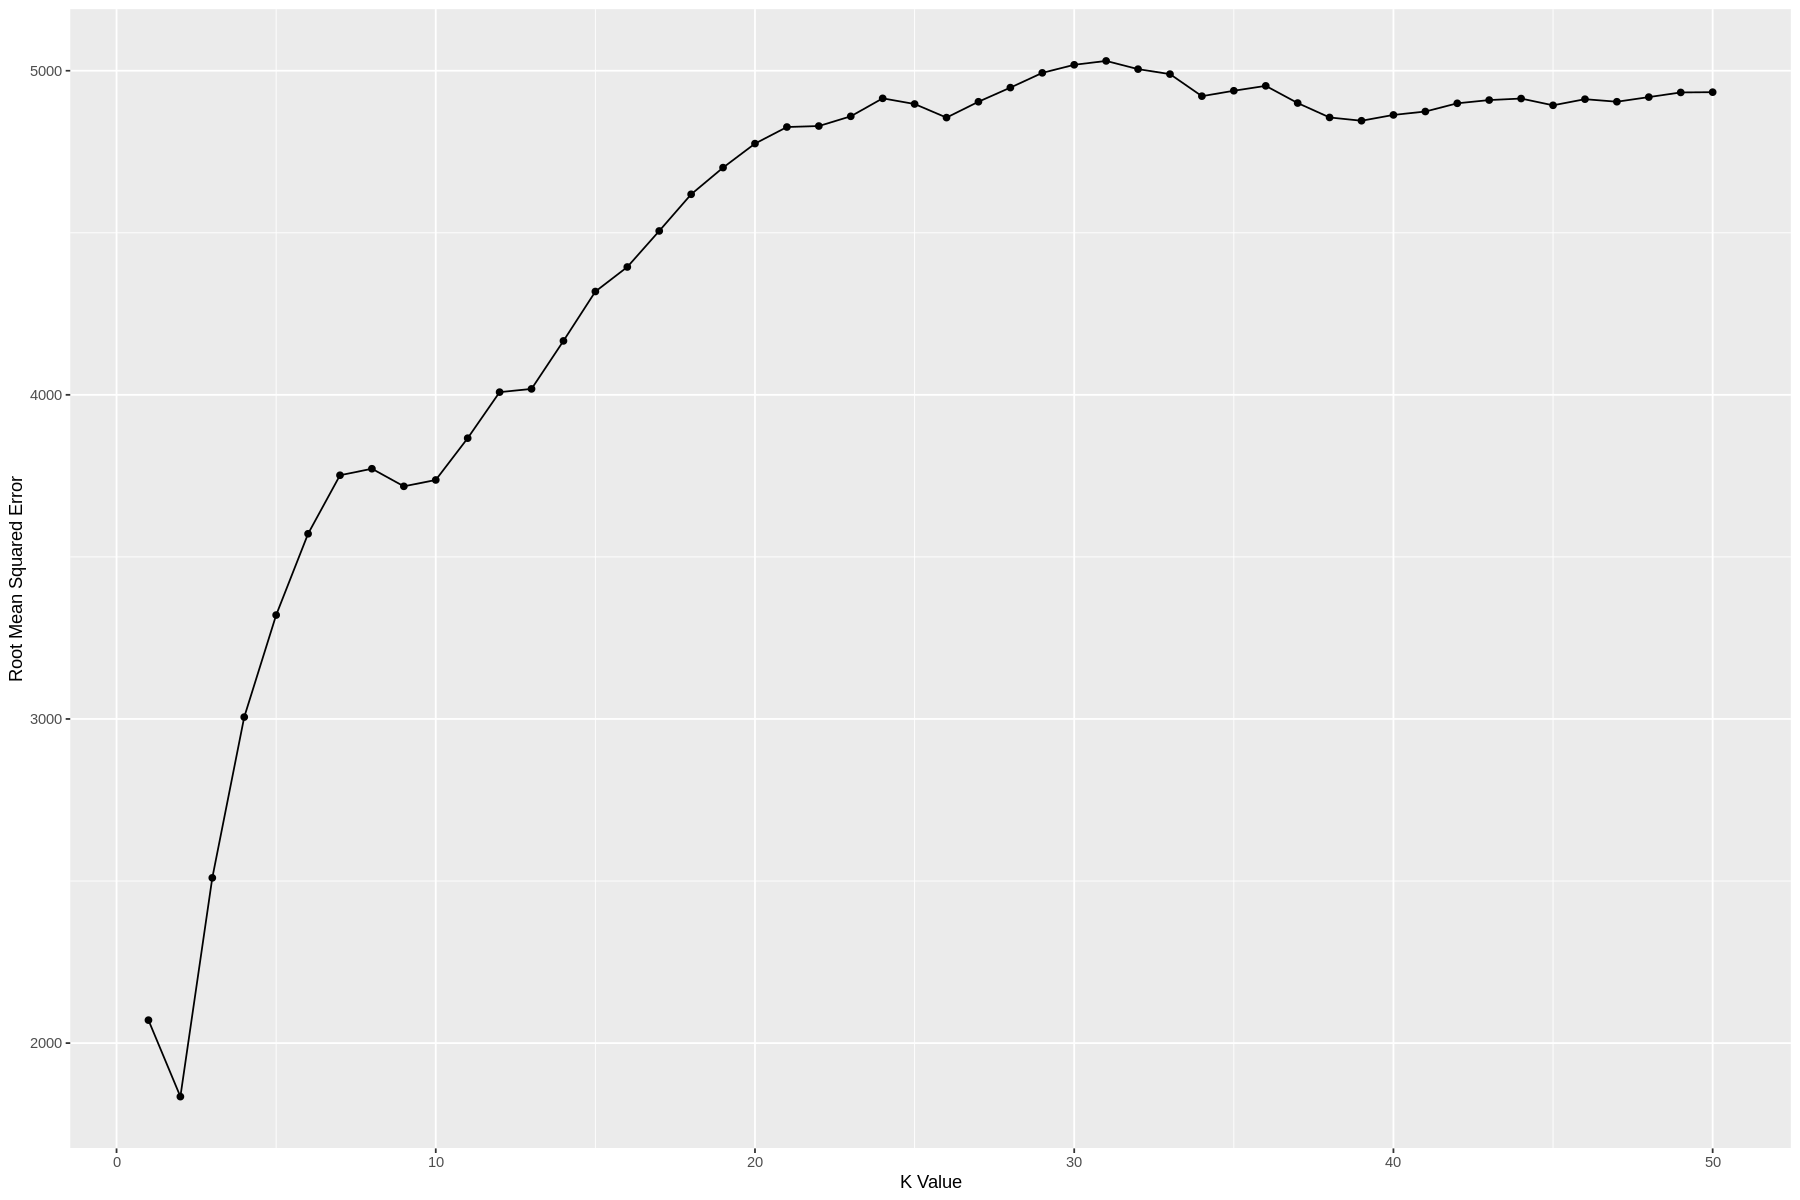

In [12]:
#plot to find best k value 

best_k_plot<-players_results|>
    filter(.metric == "rmse")|>
    ggplot(aes(x = neighbors, y = std_err))+
    geom_point()+
    geom_line()+
    labs(x = "K Value", y = "Root Mean Squared Error")
best_k_plot

Figure 2

In [13]:
# best k (lowest rmse value)
best_k<-players_min|>
    pull(1)
best_k


[1] 2

In [14]:
# calculating rmse for training set

rmse_training<-players_fit|>
    predict(players_training)|>
    bind_cols(players_training)|>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()

rmse_training

[1] 17085.62

In [15]:
# retraining model on training set with best k,
# and making predictions on testing data

players_spec_best<-nearest_neighbor(weight_func = "rectangular", neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("regression")

players_fit_best<-workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec_best)|>
    fit(data = players_training)

players_summary<-players_fit_best|>
    predict(players_testing)|>
    bind_cols(players_testing)|>
    metrics(truth = prize_money, estimate = .pred)

players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8130.8469042
rsq,standard,0.9570247
mae,standard,2959.2685625


In [16]:
# summarizing knn predictions

players_knn_preds<-players_fit_best|>
    predict(players_training)|>
    bind_cols(players_training)
players_knn_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
1456.916,1517.157,31
1658.985,1285.541,47
1788.243,1563.471,85
⋮,⋮,⋮
23747.289,18879.855,3
5605.739,8918.917,8
17177.162,22132.368,4


In [17]:
# rmspe for testing set 

rmspe_testing<-players_summary|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
rmspe_testing

[1] 8130.847

Linear Regression Model:

In [18]:
players_tidy

prize_money,best_rank
<dbl>,<int>
3261.567,44
6091.971,17
1517.157,31
⋮,⋮
1703.096,58
1048.314,74
22132.368,4


In [19]:
# recalling split data for linear regression

players_training
players_testing

prize_money,best_rank
<dbl>,<int>
1517.157,31
1285.541,47
1563.471,85
⋮,⋮
18879.855,3
8918.917,8
22132.368,4


prize_money,best_rank
<dbl>,<int>
3261.567,44
25889.586,3
2722.314,25
⋮,⋮
14773.644,6
3304.117,29
1703.096,58


In [21]:
# creating recipe and prepping model

players_lm_spec<- linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

players_lm_recipe<-recipe(prize_money ~ best_rank, data = players_training)

players_lm_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

In [22]:
# making lm workflow

players_lm_fit<-workflow()|>
    add_recipe(players_lm_recipe)|>
    add_model(players_lm_spec)|>
    fit(data = players_training)
players_lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)    best_rank  
    17950.4       -262.8  


In [23]:
# summarizing lm predictions

players_lm_preds<- players_lm_fit|>
    predict(players_training)|>
    bind_cols(players_training)

players_lm_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
9803.136,1517.157,31
5598.096,1285.541,47
-4388.874,1563.471,85
⋮,⋮,⋮
17161.96,18879.855,3
15847.88,8918.917,8
16899.14,22132.368,4


In [24]:
# calculating training rmse

players_lm_rmse<-players_lm_fit|>
    predict(players_training)|>
    bind_cols(players_training)|>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
players_lm_rmse

[1] 15839.4

In [25]:
# summarizing testing predictions 

players_lm_summary<-players_lm_fit|>
    predict(players_testing)|>
    bind_cols(players_testing)|>
    metrics(truth = prize_money, estimate = .pred)
players_lm_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.981950e+04
rsq,standard,1.864187e-01
mae,standard,7.254587e+03


In [26]:
# calculating testing rmspe 

players_lm_rmspe<-players_lm_summary|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
players_lm_rmspe

[1] 19819.5

Linear Regression RMSPE is 19819.50, K-NN Rgegression RMSPE is 8130.85. Therefore, for this data, the KNN model works better (results in a smaller error).

In [27]:
players_knn_preds
players_lm_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
1456.916,1517.157,31
1658.985,1285.541,47
1788.243,1563.471,85
⋮,⋮,⋮
23747.289,18879.855,3
5605.739,8918.917,8
17177.162,22132.368,4


.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
9803.136,1517.157,31
5598.096,1285.541,47
-4388.874,1563.471,85
⋮,⋮,⋮
17161.96,18879.855,3
15847.88,8918.917,8
16899.14,22132.368,4


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 17 row(s) containing missing values (geom_path).”


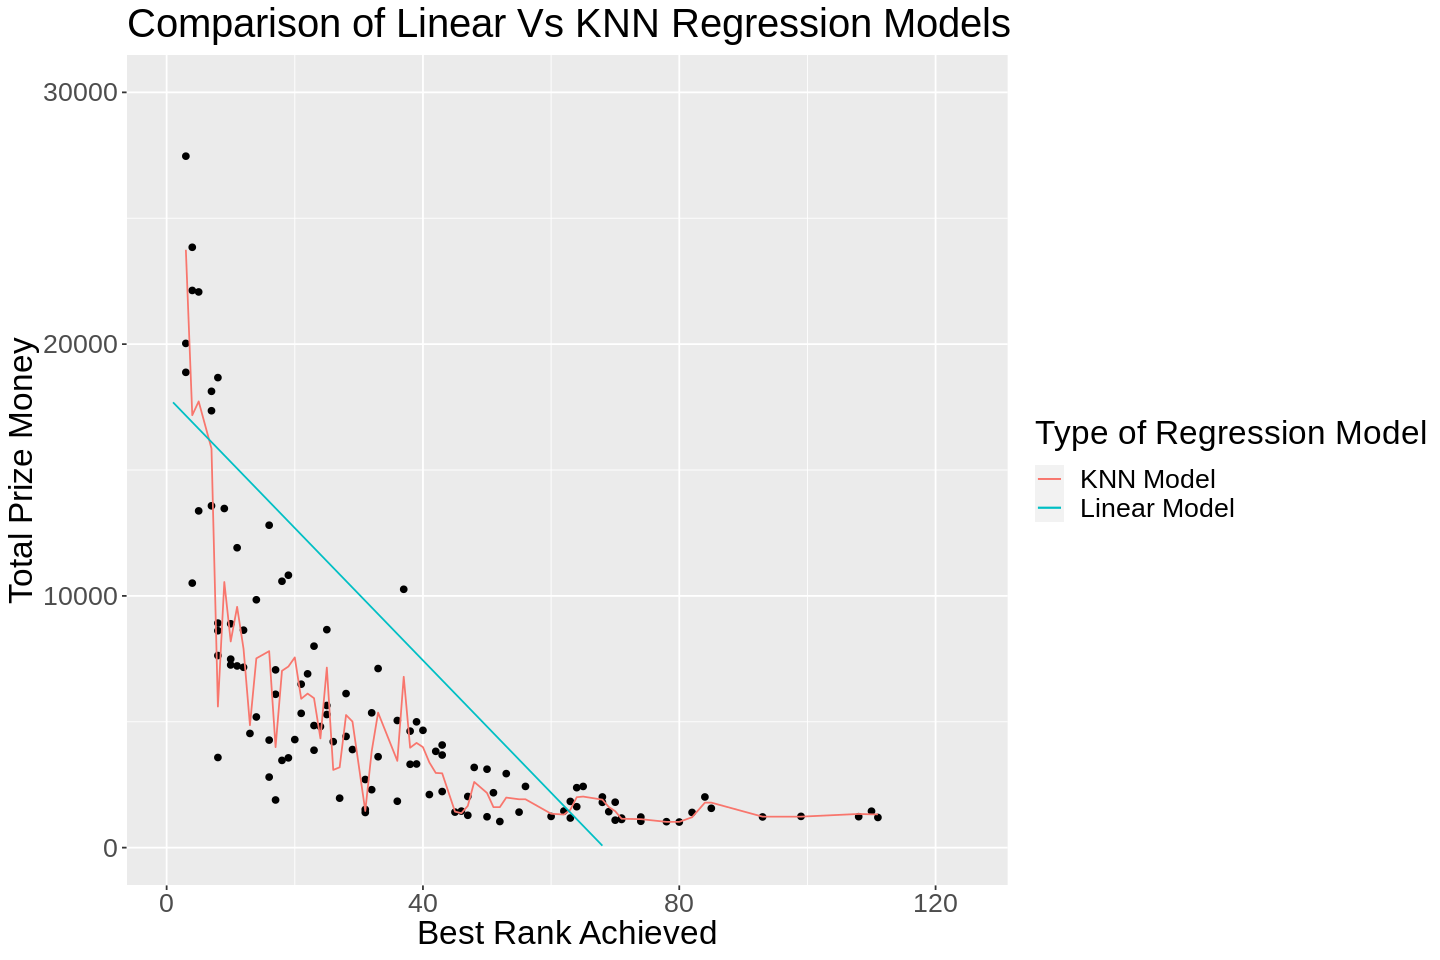

In [28]:
# overlaying plots of KNN and linear regression predictions onto true training sets.
options(repr.plot.width = 12, repr.plot.height = 8)

knn_vs_linear_plot<-ggplot(data = players_knn_preds, aes(x = best_rank, y = prize_money))+
    geom_point()+
    labs(x = "Best Rank Achieved", y = "Total Prize Money")+
    ylim(0,30000)+
    xlim(0,125)+
    geom_line(data = players_knn_preds, aes(x = best_rank, y = .pred, colour = "KNN Model"))+
    geom_line(data = players_lm_preds, aes(x = best_rank, y = .pred, colour = "Linear Model"))+
    labs(colour = "Type of Regression Model")+
    ggtitle("Comparison of Linear Vs KNN Regression Models")+
    theme(text = element_text(size = 20))
knn_vs_linear_plot



Figure 3